In [ ]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import cv2
from tensorflow.keras import optimizers

2.8.0


In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

In [ ]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='tanh', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='tanh', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='tanh', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [5]:
# Compile
sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


# Fit with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

batch_size = 32

training_generator = train_datagen.flow(x_train, y_train, batch_size=32,subset='training')
validation_generator = train_datagen.flow(x_train, y_train, batch_size=32,subset='validation')

steps_per_epoch = (x_train.shape[0] - 10000) // batch_size

r = model.fit(
    training_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = validation_generator, 
    validation_steps = 20,
    epochs = 10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1250/1250 [==============================] - 365s 291ms/step - loss: 1.5591 - accuracy: 0.4435 - val_loss: 2.2932 - val_accuracy: 0.3078
Epoch 2/10
1250/1250 [==============================] - 362s 290ms/step - loss: 1.1754 - accuracy: 0.5768 - val_loss: 1.7883 - val_accuracy: 0.4594
Epoch 3/10
1250/1250 [==============================] - 362s 290ms/step - loss: 1.0134 - accuracy: 0.6379 - val_loss: 1.5149 - val_accuracy: 0.5047
Epoch 4/10
1250/1250 [==============================] - 363s 290ms/step - loss: 0.9006 - accuracy: 0.6791 - val_loss: 1.0400 - val_accuracy: 0.6406
Epoch 5/10
1250/1250 [==============================] - 363s 290ms/step - loss: 0.8190 - accuracy: 0.7081 - val_loss: 2.0760 - val_accuracy: 0.3719
Epoch 6/10
1250/1250 [==============================] - 362s 290ms/step - loss: 0.7568 - accuracy: 0.7318 - val_loss: 2.0963 - val_accuracy: 0.3906
Epoch 7/10
1250/1250 [==============================] - 354s 283ms/step - loss: 0.7099 - accuracy: 0.7511 - val_

313/313 [==============================] - 24s 75ms/step - loss: 2.3484 - accuracy: 0.2967
Test accuracy: 0.29670000076293945


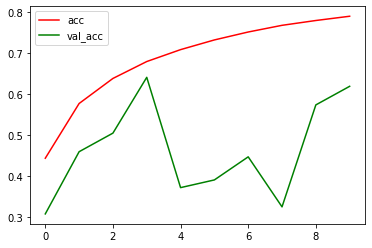

In [6]:
# Plot accuracy per iteration

score = model.evaluate(x_test, y_test)
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

print('Test accuracy:', score[1])